<a href="https://colab.research.google.com/github/joarca01/ML-course_ICL/blob/main/Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics for Machine Learning

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## PyTorch Introduction

In [3]:
# Creating tensors in PyTorch

tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([[1, 2, 3], [4, 5, 6]])

print("Tensor a:", tensor_a)
print("Tensor a shape:", tensor_a.shape)
print('\n')
print("Tensor b:", tensor_b)
print("Tensor b shape:", tensor_b.shape)

Tensor a: tensor([1, 2, 3])
Tensor a shape: torch.Size([3])


Tensor b: tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor b shape: torch.Size([2, 3])


In [4]:
# Basic operations

sum_tensors = tensor_a + tensor_b[0]
product_tensors = tensor_a * 2

print("Sum of tensors:", sum_tensors)
print("Tensor multiplied by 2:", product_tensors)

Sum of tensors: tensor([2, 4, 6])
Tensor multiplied by 2: tensor([2, 4, 6])


In [5]:
# Reshaping tensors

reshaped_tensor = tensor_b.view(3, 2)   # Equivalent to tensor_b.reshape(3,2)
print("Reshaped tensor b:", reshaped_tensor)
print("Reshaped tensor b shape:", reshaped_tensor.shape)

Reshaped tensor b: tensor([[1, 2],
        [3, 4],
        [5, 6]])
Reshaped tensor b shape: torch.Size([3, 2])


In [6]:
# Concatenating tensors

print("Tensor a shape:", tensor_a.shape)
print("Tensor b shape:", tensor_b.shape)

print(50*'-')

try:
  torch.cat([tensor_a, tensor_b])
except Exception as e:
  print(e)

print(50*'-')

tensor_cat = torch.cat([tensor_a.unsqueeze(0), tensor_b], dim=0)
print("Tensor cat shape:", tensor_cat.shape)
print("Tensor cat:", tensor_cat)

Tensor a shape: torch.Size([3])
Tensor b shape: torch.Size([2, 3])
--------------------------------------------------
Tensors must have same number of dimensions: got 1 and 2
--------------------------------------------------
Tensor cat shape: torch.Size([3, 3])
Tensor cat: tensor([[1, 2, 3],
        [1, 2, 3],
        [4, 5, 6]])


### Automatic differentiation

In [7]:
# Autograd: Automatic Differentiation
x = torch.tensor(2.0, requires_grad=True)
def y_func(x):
  return x**2 + 3*x + 1 + torch.sin(x**2)

y = y_func(x)

print('Gradient before backward call:', x.grad)
print(50*'-')

# Compute gradients
y.backward()

# Gradient of y with respect to x
print("dy/dx at x = 2:", x.grad)


Gradient before backward call: None
--------------------------------------------------
dy/dx at x = 2: tensor(4.3854)


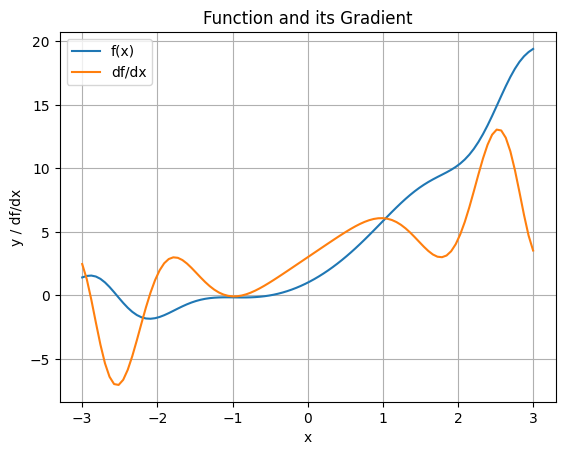

In [8]:
# Generating a range of values
x = torch.linspace(-3, 3, steps=100, requires_grad=True)

# Applying the function
y = y_func(x)

# Prepare to store gradients
grads = torch.zeros_like(x)

# Calculate gradients for each element in x
for i in range(x.size(0)):

    # Calculate the function and backpropagate on each element
    y[i].backward(retain_graph=True)

    # Store the computed gradient
    grads[i] = x.grad[i]

# Plotting
plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(), grads.numpy(), label='df/dx')
plt.xlabel('x')
plt.ylabel('y / df/dx')
plt.legend()
plt.grid()
plt.title('Function and its Gradient')
plt.show()

In [9]:
# The code is trying to solve the least square problem:
# min_{w,b} l(w,b) = |y-b-w^Tx|_2, where l(·) is the loss function
# that we solved analytically in the 06/10/2025 lecture using an
# iterative gradient-based algorithm. We will see how it works in
# the next tutorial.

# The algorithm requires the computation of the gradient of the
# loss function l(w,b) with respect to the parameters w and b to update them.

x = torch.tensor([0.2,0.8,0.9,0.3,0.2])                     # input tensor
y = torch.tensor([0,1,1,0,0]).to(dtype=torch.float32)       # expected output

# We start by initializing the parameters randomly with the flag
# requires_grad=True to tell PyTorch to record mathematical operations we do
# on the parameters (we will see what that means later in the course).

# Weights and biases b + w^T x
w = torch.randn(5, 5, requires_grad=True)
b = torch.randn(5, requires_grad=True)

learning_rate = 0.1

# Apply the iterative loop, evaluate the loss function and call loss.backward()
# to compute the gradients of loss with respect to w and b.

for _ in range(100):

  z = torch.matmul(x, w)+b
  loss = torch.norm(y-z)
  loss.backward()

  # These gradients are stored in the tensor attribute grad of w and b,
  # so w.grad = d loss / dw and b.grad = d loss / db.

  # We update the parameters w and b iteratively and hope to converge
  # to the minimum of the loss function.
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    # Zero gradients after updating
    w.grad.zero_()
    b.grad.zero_()

torch.matmul(x, w) +b

tensor([-3.9572e-04,  1.0007e+00,  1.0010e+00, -4.4376e-04,  5.4109e-04],
       grad_fn=<AddBackward0>)

## Object Oriented Programming

In [ ]:
class TensorOperations:

  def __init__(self, data):

      self.data = data
      print('Class initialised')

  def add_scalar(self, scalar):
      return self.data + scalar

  def update_data(self, new_data):
      self.data = new_data

  def mean(self):
      return torch.mean(self.data, dim=1)


In [ ]:
tensor1 = torch.linspace(0,10, 11).repeat(5,1)

print(tensor1)
print(50*'-')

# Initalising class
class1 = TensorOperations(tensor1)

# Accessing an attribute
print(class1.data)



tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])
--------------------------------------------------
Class initialised
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [ ]:
# Testing a method
value = class1.add_scalar(3)
print(value)
print(50*'-')
print(class1.data)

tensor([[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]])
--------------------------------------------------
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [ ]:
# Testing another method
class1.update_data(torch.randn(5,11))
class1.data

tensor([[ 1.1792,  0.2464, -1.5605,  0.1709, -0.0801, -0.1206,  0.2384,  1.7417,
          0.4343,  0.5878, -0.2521],
        [ 0.2889, -0.4674,  1.3002,  0.3587, -0.2792,  1.2810,  0.1958, -0.0781,
         -1.8409, -0.5197,  1.7353],
        [-0.4562,  0.8432,  0.8810, -1.7445,  0.6800,  0.5761, -0.6363,  0.1444,
          1.4698,  0.4135,  0.8030],
        [ 0.2607, -0.9500,  2.9726, -0.2130, -0.8323, -0.0660, -0.3635,  0.8509,
         -0.8490, -2.0821,  1.4283],
        [-1.3415, -1.2654, -0.0354, -0.4146,  0.3831, -0.1573, -0.9600, -1.0391,
          1.1914,  2.2647, -0.4836]])

In [ ]:
class1.data = torch.randn(5,11)+10.  # Another way to modify data
class1.data

tensor([[10.8561,  9.7478, 12.1346,  8.7598, 10.5587,  9.4633, 10.1102, 10.3329,
         11.5723, 10.4823,  9.5067],
        [ 9.5298,  9.5543,  8.4252, 10.3518,  8.3105,  9.3578, 10.8751,  8.4848,
         10.5084,  9.1222,  9.6654],
        [ 9.7335, 10.4163, 10.7443,  9.4663,  9.8190, 10.6908, 10.5005, 10.7448,
         10.1152, 11.2124,  9.5085],
        [ 9.8436,  9.5198,  8.8045,  8.2365,  8.2153, 11.1120,  9.7383, 10.3656,
          8.5397, 10.7314, 10.7008],
        [ 8.6604, 10.4627,  9.6691, 11.9331, 10.6889,  7.8306,  9.5955,  9.1965,
          8.9763, 10.9042, 10.0091]])

In [ ]:
# Inheritance

class AdvancedTensorOperations(TensorOperations):
    def __init__(self, data):
        super().__init__(data)

    def sum_of_elements(self):
        return torch.sum(self.data, dim=1)

    def product_of_elements(self):
        return torch.prod(self.data, dim=0)


In [ ]:
class2 = AdvancedTensorOperations(tensor1)
print(class2.sum_of_elements())
print(class2.product_of_elements())
print(50*'-')
print(class2.mean()) # This method is defined in the parent class

Class initialised
tensor([55., 55., 55., 55., 55.])
tensor([0.0000e+00, 1.0000e+00, 3.2000e+01, 2.4300e+02, 1.0240e+03, 3.1250e+03,
        7.7760e+03, 1.6807e+04, 3.2768e+04, 5.9049e+04, 1.0000e+05])
--------------------------------------------------
tensor([5., 5., 5., 5., 5.])


In [ ]:
class CumulativeTensorOperations(TensorOperations):
    def __init__(self, data, alpha=3):
        super().__init__(data)
        self.alpha = alpha

    def cumsum_of_elements(self):
        return torch.cumsum(self.data, dim=1) * self.alpha


class3 = CumulativeTensorOperations(tensor1, alpha=2)
print(class3.cumsum_of_elements())
print(50*'-')

try:
  class3.product_of_elements() # It doesn't inherit the methods from AdvancedTensorOperations
except Exception as e:
  print(e)

Class initialised
tensor([[  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.]])
--------------------------------------------------
'CumulativeTensorOperations' object has no attribute 'product_of_elements'


## GPU runtime - Google Colab

In [10]:
if torch.cuda.is_available():
  print("GPU available")

else:
  print("GPU not available")

GPU available


In [14]:
ones_vec = torch.ones(2, 2)
print(ones_vec.device)

cuda:0


In [15]:
# Setting default device as cuda. It won't run if cuda is not available. Change runtime first.
torch.set_default_device('cuda')

ones_vec = torch.ones(2, 2)
print(ones_vec.device)


cuda:0


In [16]:
# For more flexibility in the code

device_cpu = 'cpu'
device_cuda = 'mps'

vec1 = torch.randn(2,3, device=device_cuda)
print('Device 1:', vec1.device)
print(25*'-')

vec1 = vec1.to(device=device_cpu)
print('Device 2:', vec1.device)
print('Dtype 2:', vec1.dtype)
print(25*'-')

vec1 = vec1.to(device=device_cuda, dtype=torch.float32)
print('Device 2:', vec1.device)
print('Dtype 2:', vec1.dtype)


NotImplementedError: Could not run 'aten::empty.memory_format' with arguments from the 'MPS' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'aten::empty.memory_format' is only available for these backends: [CPU, CUDA, Meta, QuantizedCPU, QuantizedCUDA, QuantizedMeta, MkldnnCPU, SparseCPU, SparseCUDA, SparseMeta, SparseCsrCPU, SparseCsrCUDA, SparseCsrMeta, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradHIP, AutogradXLA, AutogradMPS, AutogradIPU, AutogradXPU, AutogradHPU, AutogradVE, AutogradLazy, AutogradMTIA, AutogradMAIA, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, AutogradMeta, AutogradNestedTensor, Tracer, AutocastCPU, AutocastMTIA, AutocastMAIA, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at /pytorch/build/aten/src/ATen/RegisterCPU_1.cpp:2515 [kernel]
CUDA: registered at /pytorch/build/aten/src/ATen/RegisterCUDA_0.cpp:9303 [kernel]
Meta: registered at /pytorch/build/aten/src/ATen/RegisterMeta_0.cpp:5426 [kernel]
QuantizedCPU: registered at /pytorch/build/aten/src/ATen/RegisterQuantizedCPU_0.cpp:304 [kernel]
QuantizedCUDA: registered at /pytorch/build/aten/src/ATen/RegisterQuantizedCUDA_0.cpp:187 [kernel]
QuantizedMeta: registered at /pytorch/build/aten/src/ATen/RegisterQuantizedMeta_0.cpp:109 [kernel]
MkldnnCPU: registered at /pytorch/build/aten/src/ATen/RegisterMkldnnCPU_0.cpp:223 [kernel]
SparseCPU: registered at /pytorch/build/aten/src/ATen/RegisterSparseCPU_0.cpp:836 [kernel]
SparseCUDA: registered at /pytorch/build/aten/src/ATen/RegisterSparseCUDA_0.cpp:874 [kernel]
SparseMeta: registered at /pytorch/build/aten/src/ATen/RegisterSparseMeta_0.cpp:180 [kernel]
SparseCsrCPU: registered at /pytorch/build/aten/src/ATen/RegisterSparseCsrCPU_0.cpp:730 [kernel]
SparseCsrCUDA: registered at /pytorch/build/aten/src/ATen/RegisterSparseCsrCUDA_0.cpp:828 [kernel]
SparseCsrMeta: registered at /pytorch/build/aten/src/ATen/RegisterSparseCsrMeta_0.cpp:695 [kernel]
BackendSelect: registered at /pytorch/build/aten/src/ATen/RegisterBackendSelect.cpp:792 [kernel]
Python: registered at /pytorch/aten/src/ATen/core/PythonFallbackKernel.cpp:194 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at /pytorch/aten/src/ATen/functorch/DynamicLayer.cpp:479 [backend fallback]
Functionalize: registered at /pytorch/aten/src/ATen/FunctionalizeFallbackKernel.cpp:375 [backend fallback]
Named: registered at /pytorch/aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
Conjugate: fallthrough registered at /pytorch/aten/src/ATen/ConjugateFallback.cpp:21 [kernel]
Negative: fallthrough registered at /pytorch/aten/src/ATen/native/NegateFallback.cpp:22 [kernel]
ZeroTensor: fallthrough registered at /pytorch/aten/src/ATen/ZeroTensorFallback.cpp:90 [kernel]
ADInplaceOrView: fallthrough registered at /pytorch/aten/src/ATen/core/VariableFallbackKernel.cpp:104 [backend fallback]
AutogradOther: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradCPU: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradCUDA: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradHIP: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradXLA: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradMPS: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradIPU: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradXPU: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradHPU: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradVE: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradLazy: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradMTIA: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradMAIA: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradPrivateUse1: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradPrivateUse2: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradPrivateUse3: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradMeta: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
AutogradNestedTensor: registered at /pytorch/torch/csrc/autograd/generated/VariableType_2.cpp:20142 [autograd kernel]
Tracer: registered at /pytorch/torch/csrc/autograd/generated/TraceType_2.cpp:17887 [kernel]
AutocastCPU: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:322 [backend fallback]
AutocastMTIA: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:466 [backend fallback]
AutocastMAIA: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:504 [backend fallback]
AutocastXPU: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:542 [backend fallback]
AutocastMPS: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: fallthrough registered at /pytorch/aten/src/ATen/autocast_mode.cpp:165 [backend fallback]
FuncTorchBatched: registered at /pytorch/aten/src/ATen/functorch/LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at /pytorch/aten/src/ATen/functorch/LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at /pytorch/aten/src/ATen/functorch/VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at /pytorch/aten/src/ATen/LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at /pytorch/aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at /pytorch/aten/src/ATen/functorch/TensorWrapper.cpp:210 [backend fallback]
PythonTLSSnapshot: registered at /pytorch/aten/src/ATen/core/PythonFallbackKernel.cpp:202 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at /pytorch/aten/src/ATen/functorch/DynamicLayer.cpp:475 [backend fallback]
PreDispatch: registered at /pytorch/aten/src/ATen/core/PythonFallbackKernel.cpp:206 [backend fallback]
PythonDispatcher: registered at /pytorch/aten/src/ATen/core/PythonFallbackKernel.cpp:198 [backend fallback]


### Brownian motion

 $W_t$ brownian motion if $W_t\sim \mathcal{N}(0, t)$

 For teaching purpose we are going to construct the brownian motion this way:

 $dW \sim \mathcal{N}(0, t)$ and $W_t = \int_0^t dW_s$ with $W_0=0$

In [ ]:
# Constructing a geomeric brownian motion
torch.set_default_device('cpu')

dt = 0.1

#
try:
  sqrt_dt = torch.sqrt(dt)
except Exception as e:
  print(e)

sqrt(): argument 'input' (position 1) must be Tensor, not float


In [ ]:
dt = torch.tensor([0.1])
random_gen = torch.randn(100, 10, device=device_cuda) # Generating the random variables

#
try:
  dW = torch.sqrt(dt) * random_gen
except Exception as e:
  print(e)

Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!


In [ ]:
try:
  dW = random_gen * torch.sqrt(dt).to(device=device_cuda)
  W = dW.cumsum(dim=1)
  W = torch.cat([torch.zeros(W.shape[0], 1, device=W.device), W], dim=1)
  print(W[:3,:])
except Exception as e:
  print(e)


tensor([[ 0.0000, -0.5865, -0.3292, -0.0425,  0.4527, -0.0611,  0.4108,  0.8050,
          0.6784,  1.4537,  1.9314],
        [ 0.0000,  0.5156,  0.2685,  0.2501, -0.0141, -0.1371,  0.0609,  0.6135,
          0.7242,  1.1868,  1.0594],
        [ 0.0000, -0.4288,  0.2903,  0.4306,  0.5036,  0.1184,  0.3245,  0.1647,
          0.3801,  0.6027,  0.7071]], device='mps:0')


can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
----------------------------------------------------------------------------------------------------


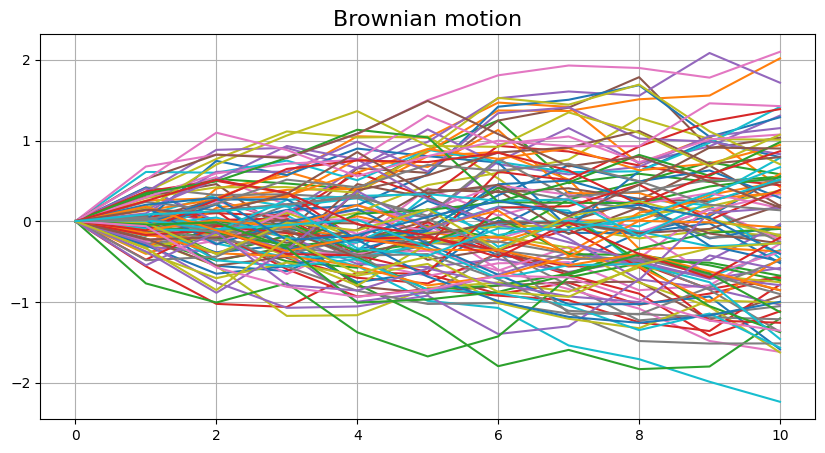

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
try:
  plt.plot(W.T)
except Exception as e:
  print(e)
  print(100*'-')

ax.plot(W.cpu().numpy().T)
ax.set_title('Brownian motion', fontsize=16)
ax.grid()
plt.show()

## Geometric Brownian Motion - putting things together (if time permits)

$$dX_t=\mu X_tdt+\sigma X_tdW_t$$

where $\mu$, $\sigma\in\mathbb{R}$ and $W_t-W_s\sim\mathcal{N}(0, t-s)$.

Although it has a closed formula, we will use a Euler discretisation for the simulation.

$$X_{t+1}=X_t+\mu X_t dt+\sigma X_tdW_t$$

In [ ]:
class GBM:

  """
  Class representing a Geometric Brownian Motion (GBM) model.

  Attributes:
  -----------
  device : torch.device
      The device (CPU or GPU) used for tensor computations.
  mu : float
      The drift coefficient of the GBM.
  sigma : float
      The volatility (standard deviation) coefficient of the GBM.
  x0 : float
      The initial value of the process.
  dt : torch.tensor
      The time step for the simulation.
  paths : torch.tensor
      The simulated paths of the GBM.
  """

  def __init__(self, mu, sigma, x0=1., dt=0.01, device='cpu'):
      """
      Initializes the GBM model with specified parameters.

      Parameters:
      ----------
      mu : float
          The expected return rate of the asset.
      sigma : float
          The standard deviation of the returns (volatility).
      x0 : float, optional
          The initial price of the asset (default is 1).
      dt : float, optional
          The time step for the simulation (default is 0.01).
      device : str, optional
          The device for computations, either 'cpu' or 'cuda' (default is 'cpu').
      """
      self.device = torch.device(device)

      self.mu = mu
      self.sigma = sigma
      self.x0 = x0
      self.dt = torch.tensor([dt], device=self.device)

      self.paths = None


  def simulate(self, n_paths=50, n_steps=20, return_paths=False):
      """
      Simulates the GBM paths.

      Parameters:
      ----------
      n_paths : int, optional
          The number of paths to simulate (default is 50).
      n_steps : int, optional
          The number of time steps for each path (default is 20).

      Returns:
      -------
      torch.tensor
          The simulated paths of the GBM, if return_paths is True.
      """
      paths = torch.zeros(n_paths, n_steps+1, device=self.device)
      paths[:,0] = self.x0

      # Incremental Brownian motion
      dW = torch.randn(n_paths, n_steps, device=self.device) * torch.sqrt(self.dt)

      for i in range(1, n_steps+1):
          paths[:,i] = paths[:,i-1] + self.mu * paths[:,i-1] * self.dt + \
                        self.sigma * paths[:,i-1] * dW[:,i-1]

      self.paths = paths
      print('Simulation done')


  def to(self, device):
      """
      Changes the device of the model and its data.

      Parameters:
      ----------
      device : str
          The target device, either 'cpu' or 'cuda'.
      """
      self.device = torch.device(device)
      self.dt = self.dt.to(device=device)

      if self.paths is not None:
          self.paths = self.paths.to(device=device)


  def plot(self):
      """
      Plots the simulated GBM paths.
      """
      if self.paths is None:
          raise RuntimeError("Paths have to be simulated first")

      plt.figure(figsize=(10,6), constrained_layout=True)
      plt.plot(self.paths.cpu().numpy().T)
      plt.grid()
      plt.title('Geometric Brownian motion with mu={}, sigma={}'.format(self.mu, self.sigma))
      plt.show()

In [ ]:
gbm1 = GBM(0.05,0.15, device='cpu')

In [ ]:
gbm1.simulate(n_paths=100)

Simulation done


In [ ]:
gbm1.to(device='cuda')

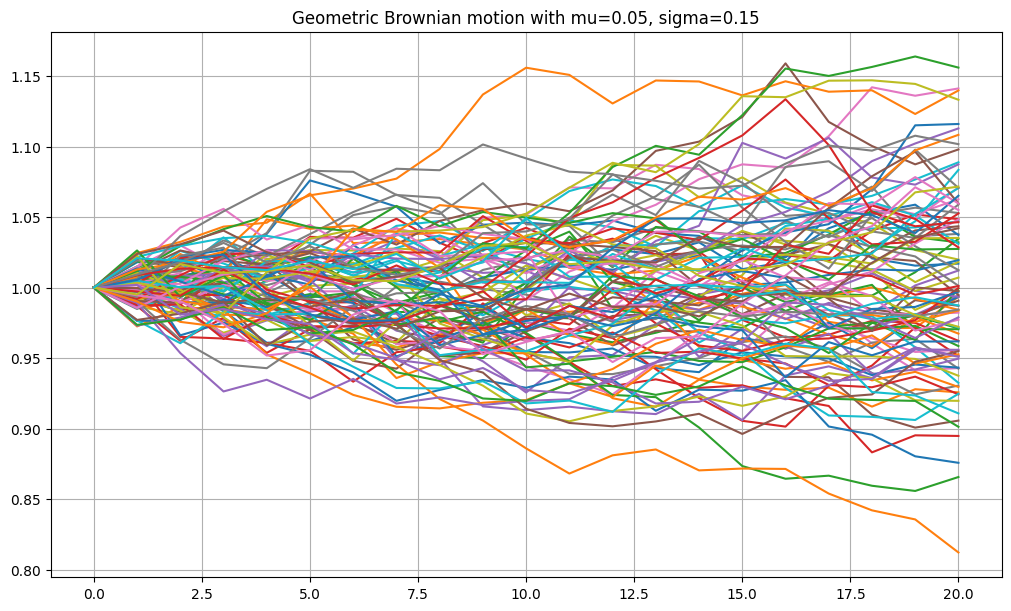

In [ ]:
gbm1.plot()

In [ ]:
# For those who are interested....

class GBM_4finance(GBM):

  def __init__(self, mu, sigma, x0=1., dt=0.01, device='cpu'):

    super().__init__(mu, sigma, dt=dt, device=device)

    self.x0 = torch.tensor([x0], requires_grad=True)

  def price(self):
      """
      Computes the mean price of a derivative at maturity.

      The price is calculated as the mean of the maximum of the difference
      between the final simulated asset prices and a strike price (assumed here as 1).

      Returns:
      -------
      torch.Tensor
          The mean price of the derivative.
      """
      # Calculate the mean price of the derivative at maturity
      return torch.max(self.paths[:, -1] - 1., torch.zeros_like(self.paths[:, -1], device=self.device)).mean()

  def compute_delta(self):
      """
      Computes the delta of an option.

      Delta is a measure of an option's sensitivity to a change in the price of the underlying asset.
      It is computed as the gradient of the option's price with respect to the initial asset price.

      Returns:
      -------
      float
          The delta value of the option.
      """
      # Compute the price and its gradient
      price_ = self.price()
      price_.backward()

      # Return the gradient (delta) as a scalar
      return self.x0.grad.item()


In [ ]:
gbm2 = GBM_4finance(0.04,0.15)
gbm2.simulate(n_paths=100)
gbm2.compute_delta()

Simulation done


0.6283898949623108